<a href="https://colab.research.google.com/github/partizanos/multimedia_security/blob/master/TP2_mutimedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 Dimitris Proios

## Encryption
This exercise will show a fundamental difference between classical cryptography techniques and (robust)
watermarking.
Exercise 1
### 1. Read in the image liftingbody.png


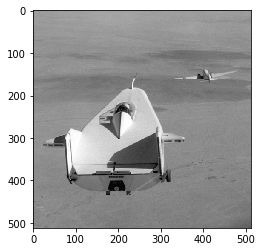

In [1]:
import matplotlib.image as mpimg; import matplotlib.pyplot as plt; import numpy as np; import requests; from PIL import Image; from io import BytesIO; import math; from skimage import data
img = np.array(Image.open(BytesIO(requests.get("https://raw.githubusercontent.com/partizanos/multimedia_security/master/tp4/liftingbody.png").content)))
plt.imshow(img, cmap="gray")

### 2. Make a permutation matrix that will map each pixel of the source image to a new 2D position. Store this matrix and use it to permute the input image to a new (permuted) output image. Show both on the screen.


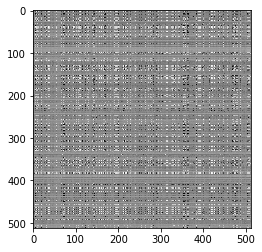

In [7]:
M, N = img.shape
arrM = np.random.permutation(M)
arrN = np.random.permutation(N)

new_img = np.zeros((M,N))
for i in range(M):
  for j in range(N):
    new_img[i,j] = img[arrM[i],arrN[j]]

plt.imshow(new_img, "gray")


### 3. Determine and show the histograms of both the original source image and the permuted image. Explain the results.
** Answer** They are identical since the chanel values are same just in different positions

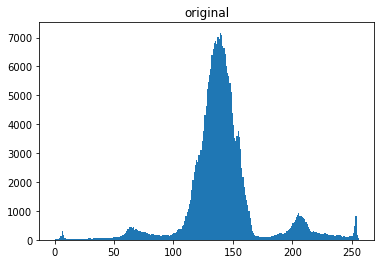

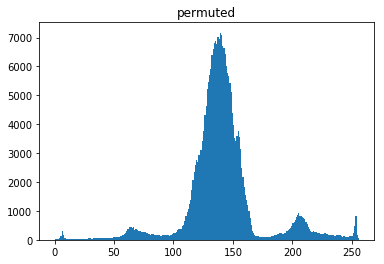

In [9]:
plt.hist(img.ravel(),256,[0,256]); plt.title("original"); plt.show()
plt.hist(new_img.ravel(),256,[0,256]); plt.title("permuted"); plt.show()
